# Тестовое задание в «Синара Банк» выполнил Иванов Артём

Ваше задание можно было бы выполнить в пару ячеек, но я решил немного поанализировать и повизуализировать.
Надеюсь решил правильно, буду очень рад попасть к вам в команду!

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Отключим сообщения об ошибках
import warnings
warnings.filterwarnings('ignore')
# Удалим ограничение количества отображаемых в таблице столбцов
pd.set_option('display.max_columns', None)

In [3]:
# Указываем путь к файлу
path = 'C:/Users/temax/Downloads/test.xlsx'
try:
    data_raw = pd.read_excel(path)
except:
    print('Путь указан неверно, попробуйте другой путь')

In [4]:
# выводим первые строчки нашего исходного файла
data_raw.head()

,Номер клиента,Макет,Доставлено,Открыто,Переход по ссылке,Отписки,Возраст,Пол
0,1,Шаблон Б,1.0,1,0,0,41.690411,М
1,2,Шаблон Б,1.0,1,0,0,28.249315,Ж
2,3,Шаблон Б,1.0,1,0,0,31.435616,М
3,4,Шаблон Б,1.0,1,0,0,34.564384,М
4,5,Шаблон Б,1.0,1,0,0,35.260274,М


In [5]:
# Взглянем на количество строк, тип данных и кол-во пропусков в каждой колонке
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42126 entries, 0 to 42125
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Номер клиента      42126 non-null  int64  
 1   Макет              42126 non-null  object 
 2   Доставлено         23007 non-null  float64
 3   Открыто            42126 non-null  int64  
 4   Переход по ссылке  42126 non-null  int64  
 5   Отписки            42126 non-null  int64  
 6   Возраст            42126 non-null  float64
 7   Пол                42126 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 2.6+ MB


In [6]:
# Для удобства дальнейшего анализа переименуем столбцы в удобный вид
data_raw.columns = ['user_num', 'group', 'deliv', 'opened', 'link', 'unsub', 'age', 'sex']

In [7]:
# Посмотрим на уникальные значения столбца deliv
data_raw['deliv'].unique()

array([ 1., nan])

Доставлено = 1, не доставлено = NaN

Типы данных всех столбцов соотвествуют смыслу, кроме столбца "Доставлено" и "Возраст".

"Доставлено" логичнее сделать int64 (но т.к. там NaN, предварительно заменим их на 0) как и "Возраст", отбросив в нём знаки после запятой. 

In [8]:
# Меняем тип данных
data_raw = data_raw.fillna(0)
columns_to_change = ['deliv','age']
for i in columns_to_change:
    data_raw[i] = data_raw[i].astype('int64', errors='ignore')

data_raw.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42126 entries, 0 to 42125
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_num  42126 non-null  int64 
 1   group     42126 non-null  object
 2   deliv     42126 non-null  int64 
 3   opened    42126 non-null  int64 
 4   link      42126 non-null  int64 
 5   unsub     42126 non-null  int64 
 6   age       42126 non-null  int64 
 7   sex       42126 non-null  object
dtypes: int64(6), object(2)
memory usage: 2.6+ MB


In [9]:
# Попытаемся найти дубликаты
data_raw.duplicated().sum()

0

Отсутствие дубликатов всегда хорошая новость

In [10]:
# Оценим статистики числовых колонок
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
user_num,42126.0,21063.500000,12160.873057,1.0,10532.25,21063.5,31594.75,42126.0
deliv,42126.0,0.546147,0.497872,0.0,0.00,1.0,1.00,1.0
opened,42126.0,0.093529,0.291176,0.0,0.00,0.0,0.00,1.0
link,42126.0,0.018326,0.134129,0.0,0.00,0.0,0.00,1.0
unsub,42126.0,0.008498,0.091795,0.0,0.00,0.0,0.00,1.0
age,42126.0,35.325856,5.369734,23.0,31.00,35.0,39.00,52.0


Уже сейчас можно сделать определённые выводы насчёт исходных данных:

- Например, можно сказать, что мы рассылаем email людям старше 23 лёт, а средний возраст получателей наших писем - 35 лет. Самые возрастные клиенты родились 52 года назад.

Можно также оценить процент открытых писем, кол-во переходов, отписок, но не хочется этого делать, т.к. в данных много недоставленных писем, и для начала нужно посмотреть, нет ли в нашем Df строчек, где колонка deliv = 0, а в opened/link/unsub != 0.

In [11]:
# Проверим наличие клиентов, которым письма отправлялись дважды
print('Количество строчек df - {}, уникальных клиентов - {}'.format(data_raw.shape[0], data_raw['user_num'].nunique()))

Количество строчек df - 42126, уникальных клиентов - 42126


Создадим отдельный df, где будут недоставленные письма и взглянем на значения статистик

In [12]:
undeliv = data_raw.query('deliv == 0')
display(undeliv.describe().T)

,count,mean,std,min,25%,50%,75%,max
user_num,19119.0,23285.46969,9111.852242,1876.0,17764.5,22544.0,29532.5,42122.0
deliv,19119.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
opened,19119.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
link,19119.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
unsub,19119.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
age,19119.0,35.36163,5.353161,23.0,31.0,35.0,39.0,52.0


Данные собраны корректно, у всех недоставленных писем значения колонок opened, link, unsub равняются нулю.

Теперь можно вернуться к описаниям статистик таблицы data_raw и можно смело сказать:

- Письма открыли 9.353% получивших наше письмо, 

- Перешли по ссылке 1.833% получивших наше письмо, 

- Отписались от рассылки 0.85% получивших наше письмо.

**Предобработка закончена, переходим к анализу данных**

*Дальше предлагаю обрабатывать шаблоны по отдельности, так будет удобнее находить отличия для дальшейшего сравнения.*

In [13]:
a_group = data_raw.query('group == "Шаблон А"').reset_index(drop=True)
a_group.head()

,user_num,group,deliv,opened,link,unsub,age,sex
0,16318,Шаблон А,0,0,0,0,25,М
1,16319,Шаблон А,0,0,0,0,43,Ж
2,16320,Шаблон А,0,0,0,0,34,М
3,16321,Шаблон А,0,0,0,0,31,М
4,16322,Шаблон А,0,0,0,0,32,Ж


In [14]:
b_group = data_raw.query('group == "Шаблон Б"').reset_index(drop=True)
b_group.head()

,user_num,group,deliv,opened,link,unsub,age,sex
0,1,Шаблон Б,1,1,0,0,41,М
1,2,Шаблон Б,1,1,0,0,28,Ж
2,3,Шаблон Б,1,1,0,0,31,М
3,4,Шаблон Б,1,1,0,0,34,М
4,5,Шаблон Б,1,1,0,0,35,М


Для дальшейней группировки добавим столбец с возрастной категорией:

- "A" - клиенты до 27 лет (включительно),

- "B" - клиенты от 28 до 40 лет (включительно),

- "C" - клиенты старше 40 лет.

In [15]:
# Напишем функцию 
def age_category(age):
    if age <= 27:
        return 'A'
    elif age > 27 and age <= 40:
        return 'B'
    else:
        return 'C'
    
# После чего применим её к нашим df    
b_group['categ'] = b_group['age'].agg(age_category)
a_group['categ'] = a_group['age'].agg(age_category)

# Выведем первые строчки Df
display(a_group.head())
display(b_group.head())

,user_num,group,deliv,opened,link,unsub,age,sex,categ
0,16318,Шаблон А,0,0,0,0,25,М,A
1,16319,Шаблон А,0,0,0,0,43,Ж,C
2,16320,Шаблон А,0,0,0,0,34,М,B
3,16321,Шаблон А,0,0,0,0,31,М,B
4,16322,Шаблон А,0,0,0,0,32,Ж,B


,user_num,group,deliv,opened,link,unsub,age,sex,categ
0,1,Шаблон Б,1,1,0,0,41,М,C
1,2,Шаблон Б,1,1,0,0,28,Ж,B
2,3,Шаблон Б,1,1,0,0,31,М,B
3,4,Шаблон Б,1,1,0,0,34,М,B
4,5,Шаблон Б,1,1,0,0,35,М,B


Отлично, теперь мы можем анализировать

In [16]:
# Оценим количество недоставленных сообщений
print('Шаблон А')
print('Общее количество писам в Шаблоне А:', a_group.shape[0])
print('Количество недоставленных писем в Шаблоне А:', a_group.query('deliv == 0').shape[0])
print('Процент недоставленных писем от общего:', round(a_group.query('deliv == 0').shape[0]/a_group.shape[0]*100,2), '%')
print()
print('Шаблон Б')
print('Общее количество писам в Шаблоне Б:', b_group.shape[0])
print('Количество недоставленных писем в Шаблоне Б:', b_group.query('deliv == 0').shape[0])
print('Процент недоставленных писем от общего:', round(b_group.query('deliv == 0').shape[0]/b_group.shape[0]*100,2), '%')

Шаблон А
Общее количество писам в Шаблоне А: 25809
Количество недоставленных писем в Шаблоне А: 15786
Процент недоставленных писем от общего: 61.16 %

Шаблон Б
Общее количество писам в Шаблоне Б: 16317
Количество недоставленных писем в Шаблоне Б: 3333
Процент недоставленных писем от общего: 20.43 %


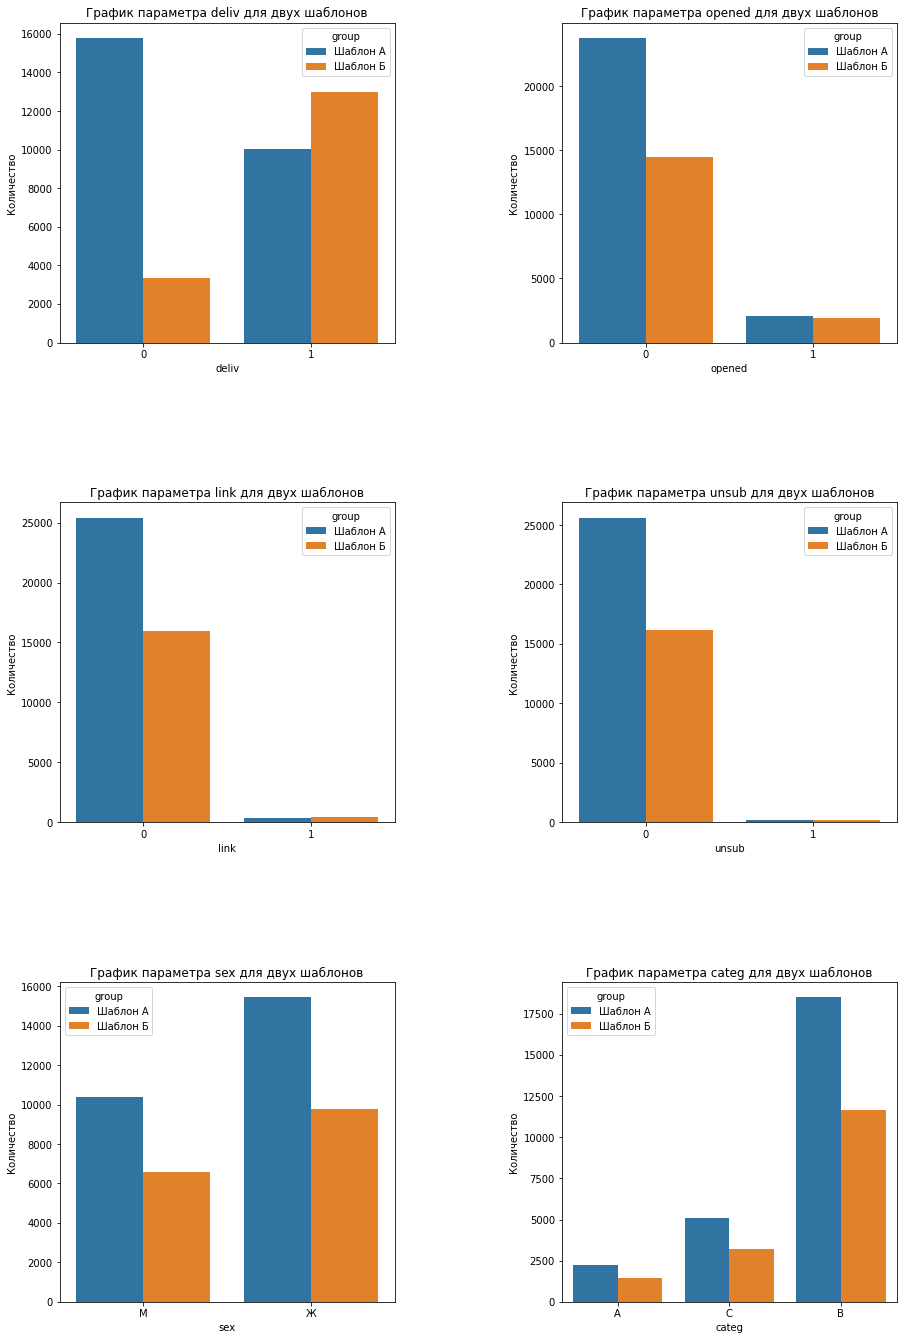

In [17]:
# Для визуализации объеденим шаблоны в 1 Df и заменим пропуски на 0
all_data = pd.concat([a_group, b_group]).fillna(0)

columns_to_viz = ['deliv', 'opened', 'link', 'unsub', 'sex', 'categ']
plt.figure(figsize=(15,50))
for i, par in enumerate(columns_to_viz):
    plt.subplot(6,2,i+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.countplot(data=all_data, x=par, hue='group')
    plt.title('График параметра {} для двух шаблонов'.format(par))
    plt.xlabel(par)
    plt.ylabel('Количество')

Проанализировав графики выше, можно сказать следующее:

- В шаблоне А наблюдается огромное количество недоставленных писем, на это может быть несколько причин (техническая - допущена какая-либо ошибка при формировании email для отправки или же пользователи этого шаблона указали недействительные адреса своих почт),

- Количество открытых писем практически одинаковое для двух Шаблонов, это показывает, что Шаблон Б более эффективен, т.к. полезный эффект равен, но в шаблоне В было на 9,5 тыс меньше отправленных писем,

- Количество переходов по ссылке больше у шаблона Б,

- Пропорции гендерного состава получателей совпадают у обоих Шаблонов, 

- Пропорции возрастных групп также совпадают

Даже не определяя точные цифры, можно сделать следующий вывод:

**Шаблон Б многоэффективнее Шаблона А, т.к. в нём:**

1) Меньший процент недоставленных писем (20.43% против 61.16%)

2) Полезный эффект в абсолютных значениях практически аналогичен Шаблону А (не стоит забывать, что писем в Шаблоне А больше на 9,5 тысяч)

In [18]:
# Самое главное - построим таблицу для выполнения задания
result = all_data.groupby(['group', 'categ', 'sex']).agg({'deliv':'sum', 'opened':'sum', 'link':'sum', 'unsub':'sum'})
result

deliv  opened  link  unsub
group    categ sex                            
Шаблон А A     Ж      630      87    11      5
               М      229      32     4      2
         B     Ж     4236     761   155     72
               М     2959     706   122     69
         C     Ж     1094     217    39     19
               М      875     262    51     24
Шаблон Б A     Ж      865      63    12      8
               М      313      23     4      5
         B     Ж     5534     677   149     59
               М     3721     632   123     65
         C     Ж     1393     219    50     14
               М     1158     261    52     16

Сделаем подобную таблицу - только выразим deliv, opened, link и unsub в процентах от количества отправленных.

In [19]:
percent = all_data.groupby(['group', 'categ', 'sex']).agg({'deliv':'count'})
percent = percent.rename(columns={'deliv':'sended'})
percent = pd.concat([percent, result], axis=1)
params = ['deliv', 'opened', 'link', 'unsub']
for i in params:
    percent[i] = round(percent[i]/percent['sended']*100,3)
percent    

sended   deliv  opened   link  unsub
group    categ sex                                      
Шаблон А A     Ж      1644  38.321   5.292  0.669  0.304
               М       577  39.688   5.546  0.693  0.347
         B     Ж     10920  38.791   6.969  1.419  0.659
               М      7585  39.011   9.308  1.608  0.910
         C     Ж      2878  38.013   7.540  1.355  0.660
               М      2205  39.683  11.882  2.313  1.088
Шаблон Б A     Ж      1075  80.465   5.860  1.116  0.744
               М       380  82.368   6.053  1.053  1.316
         B     Ж      6956  79.557   9.733  2.142  0.848
               М      4706  79.069  13.430  2.614  1.381
         C     Ж      1720  80.988  12.733  2.907  0.814
               М      1480  78.243  17.635  3.514  1.081

Т.о., мы можем видеть, что в относительных значениях **Шаблон Б многоэффективнее Шаблона А**.

Единственный плюс Шаблона А, так это то, что процент отписавшихся мужчин и женщин от 23 до 40 включительно меньше, чем у Шаблона Б, других достоинств у него нет.

У нас недостаточно данных, чтобы определить причину неудачи Шаблона А, мы располагаем только результатом - большое количество недоставленных писем.

Рекомендации по отправке макетов:

1) Процент открытых писем, а также переходов по ссылке для клиентов до 27 очень низок (в сравнении с другими группами), отправку таких писем следует прекратить (ввиду неэффективности) или полностью переработать, например заменить на push-up в мобильном приложении,

2) Самую высокую активность (чтение писем и переходы по ссылкам) демонстрируют клиенты старше 41 года, нужно фокусироваться на них и отправлять большую часть писам именно таким клиентам. Это доказывает как и их активность, так и то, что люди после 40 более серьезно относятся к финансам и планированию бюджета, поэтому внимательнее изучают предложения на рынке.

3) В следующей рассылке при гендерную пропорцию можно сместить в сторону мужчин, т.к. по статистике мужчины чаще совершают полезные нам активности (чтение писем и переходы по ссылкам) и чаще отвечают за бюджет в семьях.